<a href="https://colab.research.google.com/github/KikiNyan/emotion-detection-system/blob/main/SER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
Speech Emotion Detection Using LSTM-RNN
Faisal Al Raiyan
Metric: MC223106
Department of Computer Science & Engineering

SyntaxError: invalid syntax (<ipython-input-55-7537f70ff4fd>, line 1)

In [5]:
!pip install scikit-learn numpy pandas librosa matplotlib tensorflow keras

In [53]:
import numpy as np
import pandas as pd
import os
import librosa
import wave
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop
print("loaded libraries")





loaded libraries


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
def extract_mfcc(wav_file_name):
    y,sr=librosa.load(wav_file_name)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc


In [18]:
    radvess_speech_labels =[]
    ravdess_speech_data=[]
    for dirname,_, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/speech-emotion-recognition-ravdess-data'):
        for filename in filenames:
            radvess_speech_labels.append(int(filename[7:8])-1)
            wav_file_name=os.path.join(dirname,filename)
            ravdess_speech_data.append(extract_mfcc(wav_file_name))
    print("Finish loading dataset")

work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesfully
work succesful

In [19]:
ravdess_speech_data

[array([-5.5319366e+02,  4.1932568e+01, -5.2114601e+00,  7.3127418e+00,
         6.9644727e-02, -3.3563764e+00, -6.6405888e+00, -7.5790653e+00,
        -1.1458306e+01, -6.6911654e+00, -1.2373770e+00, -6.6593413e+00,
        -1.9200140e+00, -3.3397613e+00, -6.6722255e+00, -7.3684585e-01,
        -8.1466303e+00, -5.0727181e+00, -2.7859113e+00, -4.3866029e+00,
        -5.5673394e+00, -2.8987210e+00, -4.1099854e+00, -5.6156526e+00,
        -1.9953969e+00, -3.9410371e-01, -2.5663044e+00,  3.2443514e+00,
        -3.0893910e-01,  1.6121823e+00, -9.4186291e-02,  6.1416686e-01,
        -3.2102862e-01, -1.5135823e+00, -2.4289567e+00, -6.7368150e-02,
        -4.2473078e-01, -6.6592187e-01, -1.4736134e+00, -1.0706234e+00],
       dtype=float32),
 array([-6.6147937e+02,  5.6338783e+01, -1.0038917e-01,  1.2948811e+01,
         3.4572415e+00, -1.0980011e+00, -3.9645517e+00, -7.3141699e+00,
        -1.1041139e+01, -2.5731161e+00, -8.0596876e-01, -3.7987456e+00,
        -1.9456607e+00, -5.4775467e+00, 

In [22]:
 ravdess_speech_data_array=np.asarray(ravdess_speech_data)
 ravdess_speech_label_array=np.array(radvess_speech_labels)
 ravdess_speech_label_array.shape #get tuple of array dimension
 labels_categorical=to_categorical(ravdess_speech_label_array) #convert a class vector to binary class matrix
 labels_categorical.shape

(60, 8)

In [23]:
ravdess_speech_data_array

array([[-5.5319366e+02,  4.1932568e+01, -5.2114601e+00, ...,
        -6.6592187e-01, -1.4736134e+00, -1.0706234e+00],
       [-6.6147937e+02,  5.6338783e+01, -1.0038917e-01, ...,
        -2.2216904e+00, -2.7736628e+00, -2.2735069e+00],
       [-4.9126050e+02,  3.5171394e+01, -9.0343437e+00, ...,
        -1.5138908e-01, -3.4193611e+00, -1.5459820e+00],
       ...,
       [-6.9285577e+02,  5.5363899e+01, -1.5483186e+00, ...,
        -3.0869720e+00, -3.2097478e+00, -2.3071592e+00],
       [-6.0522461e+02,  5.1048885e+01, -5.4272108e+00, ...,
         3.2384373e-02, -2.1314406e+00, -7.4637967e-01],
       [-6.8382538e+02,  5.2923653e+01, -3.5020807e+00, ...,
        -9.8104632e-01, -2.7713552e+00, -2.3696709e+00]], dtype=float32)

In [24]:
x_train,x_test,y_train,y_test=train_test_split(np.array(ravdess_speech_data_array),labels_categorical,test_size=0.2,random_state=9)

In [26]:
number_of_samples=ravdess_speech_data_array.shape[0]
training_samples=int(number_of_samples*0.8)
validation_samples=int(number_of_samples*0.1)
test_samples=int(number_of_samples*0.1)

In [29]:
def create_model_LSTM():
    model=Sequential()
    model.add(LSTM(128,return_sequences=False,input_shape=(40,1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
    return model

In [30]:
w=np.expand_dims(ravdess_speech_data_array[:training_samples],1)

In [31]:
w.shape

(48, 1, 40)

In [59]:
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples], -1),
                      labels_categorical[:training_samples],
                      validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples], -1),
                                       labels_categorical[training_samples:training_samples+validation_samples]),
                      batch_size=128,
                      epochs=130,
                      shuffle=True)

Epoch 1/130


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1250 - loss: 2.1000 - val_accuracy: 0.0000e+00 - val_loss: 2.2382
Epoch 2/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.0417 - loss: 2.0768 - val_accuracy: 0.0000e+00 - val_loss: 2.2338
Epoch 3/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.1250 - loss: 2.0810 - val_accuracy: 0.0000e+00 - val_loss: 2.2026
Epoch 4/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.1667 - loss: 2.0600 - val_accuracy: 0.0000e+00 - val_loss: 2.1889
Epoch 5/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.1667 - loss: 2.0454 - val_accuracy: 0.0000e+00 - val_loss: 2.1707
Epoch 6/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.1042 - loss: 2.0738 - val_accuracy: 0.0000e+00 - val_loss: 2.1594
Epoch 7/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.2083 - loss: 2.0039 - val_accuracy: 0.0000e+00 - val_loss: 2.1748
Epoch 8/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.2083 - loss: 1.9969 - val_accurac

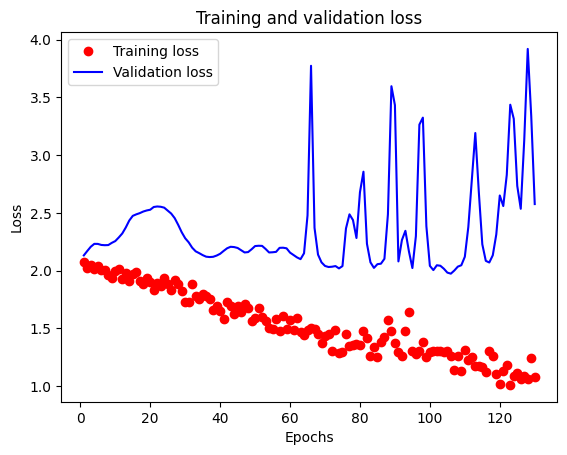

In [38]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'ro',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

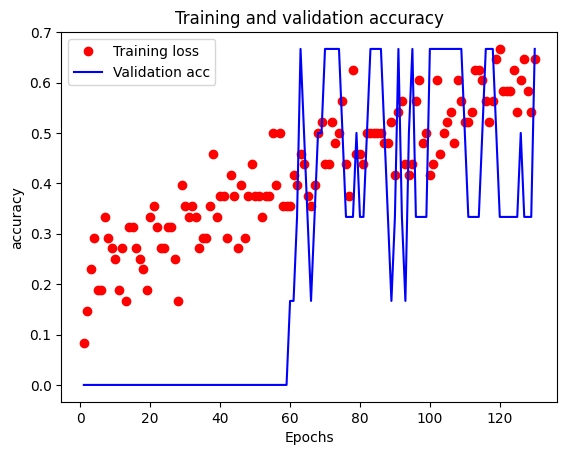

In [58]:
acc=history.history['accuracy']
val_loss=history.history['val_accuracy']
epochs=range(1,len(loss)+1)
plt.plot(epochs,acc,'ro',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [40]:
model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples+validation_samples:], -1),
                 labels_categorical[training_samples+validation_samples:])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.0000e+00 - loss: 3.5334


[3.5334243774414062, 0.0]

In [43]:
emotion={0:'neutral',1:'calm',2:'happy',3:'sad',4:'angry',5:'fearful',6:'disgust',7:'surprised'}
def predict(wav_filepath):
    test_point=extract_mfcc(wav_filepath)
    test_point=np.reshape(test_point,newshape=(1,40,1))
    prediction=model_A.predict(test_point)
    print(emotion[np.argmax(prediction[0]+1)])

In [45]:
predict('/content/drive/MyDrive/Colab Notebooks/speech-emotion-recognition-ravdess-data/03-01-01-01-01-01-01.wav')

work succesfully
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
fearful


In [57]:
predict('/content/drive/MyDrive/Colab Notebooks/speech-emotion-recognition-ravdess-data/03-01-08-02-02-02-01.wav')

work succesfully
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
disgust


In [56]:
predict('/content/drive/MyDrive/Colab Notebooks/speech-emotion-recognition-ravdess-data/03-01-05-02-01-02-01.wav')

work succesfully
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
angry


In [51]:
model_A.save('my_model_A.keras')


In [54]:
modelc=tf.keras.models.load_model('my_model_A.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 11 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
